# Zadanie 1
Użyjemy paczki pyswarms, by uruchomić algorytm Particle Swarm Optimizer do
wyszukania maksimum funkcji Endurance, z problemu inżynieryjnego.

a) Rzucimy okiem na tutorial o podstawowej optymalizacji:
https://pyswarms.readthedocs.io/en/latest/examples/tutorials/basic_optimization.html#Optimizing-a-function

i wykorzystajmy ją na początek do minimalizacji funkcji Sphere, tak jak robiliśmy
to na poprzednich zajęciach:

In [1]:
pip install pyswarms

     |████████████████████████████████| 104 kB 5.6 MB/s 


In [2]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2,
options=options)
optimizer.optimize(fx.sphere, iters=1000)

2022-04-05 18:42:32,240 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=2.25e-44
2022-04-05 18:42:34,516 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.2462093876216813e-44, best pos: [-1.48034196e-22  2.34087767e-23]


(2.2462093876216813e-44, array([-1.48034196e-22,  2.34087767e-23]))

b) Spróbujmy teraz dodać ograniczenia dla dziedziny (obszaru), w którym szukamy
minimum. Trzeba ustalić ograniczenie górne i dolne dla wszystkich zmiennych,
weźmy minimum 1, maksimum 2 – dla wszystkich zmiennych.

In [3]:
x_max = [2, 2]
x_min = [1, 1]
my_bounds = (x_min, x_max)

I oczywiście ograniczenia trzeba przekazać jako parametr do optimizera poprzez
argument:

In [4]:
bounds=my_bounds

In [5]:
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=bounds)
optimizer.optimize(fx.sphere, iters=1000)

2022-04-05 18:42:35,979 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=2.03
2022-04-05 18:42:39,085 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.0288300189423083, best pos: [1.01395639 1.00036116]


(2.0288300189423083, array([1.01395639, 1.00036116]))

c) Zmieńmy teraz ten kod tak, by rozwiązywał problem inżynieryjny. Po pierwsze
trzeba zmienić limity: min 0, max 1 dla wszystkich sześciu zmiennych.
Oczywiście dimensions trzeba ustawić na 6.
Uwaga, zamiast wypisywać długie wektory limitów ręcznie, można użyć numpy:
np.zeros(6), np.ones(6).

In [6]:
import numpy as np
x_max = np.ones(6)
x_min = np.zeros(6)
my_bounds = (x_min, x_max)
bounds=my_bounds

In [7]:
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=6, options=options, bounds=bounds)
optimizer.optimize(fx.sphere, iters=1000)

2022-04-05 18:42:39,144 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.333
2022-04-05 18:42:42,092 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.3326069037510859, best pos: [0.12435895 0.05346494 0.00797154 0.16621099 0.12374559 0.52084609]


(0.3326069037510859,
 array([0.12435895, 0.05346494, 0.00797154, 0.16621099, 0.12374559,
        0.52084609]))

d) Teraz najciekawsza część, czyli zmiana funkcji fx.sphere na endurance. Pojawia
się tu mały problem: funkcja endurance dostaje jeden punkt z 6 współrzędnymi
i zwraca jedną wartość liczbową. Natomiast optimizer potrzebuje funkcji która
dostaje cały rój punktów z sześcioma zmiennymi i zwraca tablicę wartości
funkcji dla całego roju.
Musimy więc napisać funkcję do optymalizacji, która wywołuje funkcję
endurance dla wszystkich cząstek. Warto zajrzeć do tutoriala, gdzie to zrobiono
na innym przykładzie:
https://pyswarms.readthedocs.io/en/latest/examples/usecases/train_neural_network.html#Constructing-a-custom-objective-function
W tutorialu chcemy optymalizować funkcję forward_prop, ale musimy
dodatkowo napisać funkcję f dla całego roju, która przebiega pętlą po całym
roju. Wykorzystaj ten pomysł i:

  • Popraw funkcję endurance, by pobierała tablicę sześciu argumentów, a
nie sześć oddzielnych argumentów

  • Dopisz funkcję f, która przebiegnie po całym roju uruchamiając dla każdej
cząstki endurance.

  • Wrzuć f do optymalizatora.

In [13]:
import math

def endurance(x):
  return (math.exp(-2*(x[1]-math.sin(x[0]))**2)+math.sin(x[2]*x[3])+math.cos(x[4]*x[5]))

e) Powyższy wynik jest oczywiście zły, bo funkcja szuka minimum zamiast
maximum. Czy można to zmienić w prosty sposób w optimizerze? Ja niestety nie
znalazłem takiej opcji Trzeba więc zrobić sztuczkę, taką jak przy algorytmie
genetycznym i dopisać minus do funkcji endurance.

In [14]:
import math

def endurance(x):
  return -(math.exp(-2*(x[1]-math.sin(x[0]))**2)+math.sin(x[2]*x[3])+math.cos(x[4]*x[5]))

In [15]:
def f(x):
  n_particles=x.shape[0]
  j=[endurance(x[i])for i in range(n_particles)]
  return np.array(j)

In [16]:
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=6, options=options, bounds=bounds)
optimizer.optimize(f, iters=1000)

2022-04-05 18:48:45,121 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-2.82
2022-04-05 18:48:47,512 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.8248728823098324, best pos: [0.67305394 0.6023122  0.99664311 0.97771091 0.14843429 0.3836829 ]


(-2.8248728823098324,
 array([0.67305394, 0.6023122 , 0.99664311, 0.97771091, 0.14843429,
        0.3836829 ]))

Wyświetlmy jeszcze wykres kosztu zgodnie ze wskazówkami z:
https://pyswarms.readthedocs.io/en/latest/api/pyswarms.utils.plotters.html

NameError: ignored

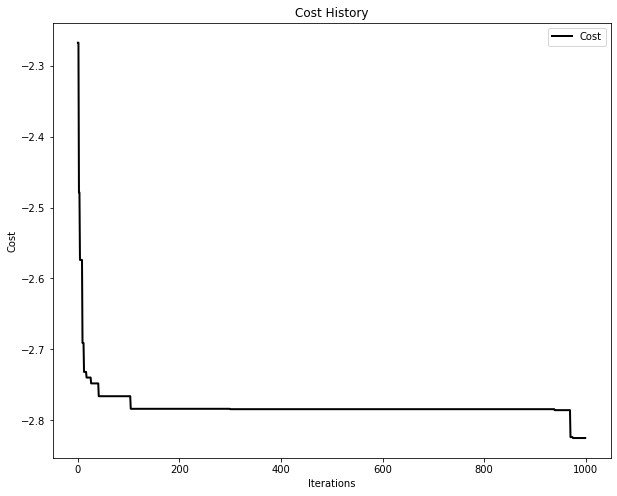

In [17]:
from pyswarms.utils.plotters import plot_cost_history
cost_history = optimizer.cost_history
plot_cost_history(cost_history)
plt.show()